In [1]:
import pandas as pd

basic = pd.read_csv("ROSMAP_973_samples_basic.csv")
longs = pd.read_csv("ROSMAP_973_samples_longs.csv")

In [2]:
basic.shape

(973, 80)

In [3]:
basic.columns

Index(['UniquePhenoID', 'Status_at_draw', 'Predicted Class', 'AD Probability',
       'CO Probability', 'DLB Probability', 'FTD Probability',
       'PD Probability', 'projid', 'study', 'scaled_to', 'apoe_genotype',
       'tomm40_hap', 'synap_6_complex1', 'synap_6_complex2', 'synap_6_snap25',
       'synap_6_synaptophys', 'synap_6_syntaxin', 'synap_6_vamp',
       'zcapture_syn_6', 'zcomplexin_6', 'zsnare_6', 'age_first_ad_dx',
       'cogdx', 'cognep_demog_slope', 'cognep_path_slope', 'cogng_demog_slope',
       'cogng_path_slope', 'cognpo_demog_slope', 'cognpo_path_slope',
       'cognps_demog_slope', 'cognps_path_slope', 'cognse_demog_slope',
       'cognse_path_slope', 'cognwo_demog_slope', 'cognwo_path_slope',
       'age_bl', 'age_death', 'educ', 'msex', 'race7', 'spanish',
       'alcohol_g_bl', 'ldai_bl', 'smoking', 'cancer_bl', 'headinjrloc_bl',
       'med_con_sum_bl', 'thyroid_bl', 'ad_reagan', 'braaksc', 'ceradsc',
       'gpath', 'niareagansc', 'pmi', 'amyloid', 'plaq_d',

In [4]:
longs.columns

Index(['UniquePhenoID', 'Status_at_draw', 'Predicted Class', 'AD Probability',
       'CO Probability', 'DLB Probability', 'FTD Probability',
       'PD Probability', 'projid', 'study',
       ...
       'parkinsonism_tri', 'parksc', 'rigidsc', 'tremsc', 'copd_poss', 'mep',
       'mip', 'pul_function', 'vision', 'projid_visit'],
      dtype='object', length=122)

In [5]:
basic['Status_at_draw'].value_counts()

Status_at_draw
NCI        507
MCI        262
AD         167
AD+         17
MCI+        10
OTHRDEM     10
Name: count, dtype: int64

### Neuropathological Trail and Cognitive Tests


Summary for 'braaksc':
    braaksc           Status      Mean        SE
0       1.0   AD Probability  0.108549  0.081771
1       1.0   CO Probability  0.479034  0.131217
2       1.0  DLB Probability  0.098242  0.070934
3       1.0  FTD Probability  0.002101  0.001736
4       1.0   PD Probability  0.312074  0.118003
5       2.0   AD Probability  0.193868  0.075294
6       2.0   CO Probability  0.614962  0.093590
7       2.0  DLB Probability  0.049439  0.043497
8       2.0  FTD Probability  0.001515  0.001412
9       2.0   PD Probability  0.140217  0.062607
10      3.0   AD Probability  0.269284  0.053096
11      3.0   CO Probability  0.427089  0.054318
12      3.0  DLB Probability  0.069650  0.023957
13      3.0  FTD Probability  0.002705  0.001704
14      3.0   PD Probability  0.231273  0.039192
15      4.0   AD Probability  0.348625  0.040612
16      4.0   CO Probability  0.387133  0.040982
17      4.0  DLB Probability  0.057362  0.018609
18      4.0  FTD Probability  0.011658  0.010

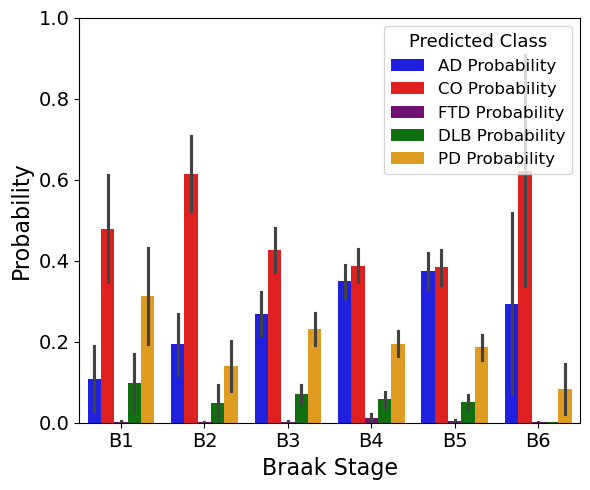

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define predicted probability variables and corresponding colors
y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']
palette = dict(zip(y_vars, colors))

# List of categorical neuropathological variables (e.g., Braak stage, CERAD, NIA-Reagan)
# categorical_features_longs = ['ceradsc']
categorical_features_longs = ['braaksc']
# categorical_features_longs = ['niareagansc']

# Filter samples if needed (e.g., only MCI); here all samples are used
basic_mci = basic[basic['Status_at_draw'] == 'MCI'].copy()
# basic_mci = basic.copy()

# Loop through each categorical variable
for cat_var in categorical_features_longs:
    if cat_var not in basic.columns:
        continue  # Skip if variable not present

    # Subset relevant columns and drop rows with missing values
    plot_data = basic_mci[[cat_var] + y_vars].dropna()
    if plot_data.empty:
        continue  # Skip if nothing to plot

    # Reshape data from wide to long format for seaborn plotting
    plot_data_melted = plot_data.melt(
        id_vars=cat_var,
        value_vars=y_vars,
        var_name='Status',        # Predicted class label
        value_name='Probability'  # Corresponding predicted probability
    )

    # Calculate group-wise mean and standard error
    summary = plot_data_melted.groupby([cat_var, 'Status']).agg(
        Mean=('Probability', 'mean'),
        SE=('Probability', lambda x: x.std() / (len(x)**0.5))
    ).reset_index()

    # Output the computed summary table to console
    print(f"\nSummary for '{cat_var}':")
    print(summary)

    # Define the plotting order for the x-axis
    plot_data_melted[cat_var] = 'B' + plot_data_melted[cat_var].astype(int).astype(str)
    order = sorted(plot_data_melted[cat_var].unique(), key=lambda x: int(x[1:]))
    # order = sorted(plot_data_melted[cat_var].unique())

    # Create the barplot
    plt.figure(figsize=(6, 5))
    sns.barplot(
        data=plot_data_melted,
        x=cat_var,
        y='Probability',
        hue='Status',
        palette=palette,
        errorbar='se',
        estimator='mean',
        order=order
    )

    # Format the plot
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Braak Stage', size=16)  # You can adjust label for other variables
    plt.ylabel('Probability', size=16)
    plt.ylim(0, 1)
    plt.legend(title='Predicted Class', loc='upper right', fontsize=12, title_fontsize=13)
    # plt.legend([],[], frameon=False)
    # plt.title(f'ROSMAP: {cat_var}', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.show()


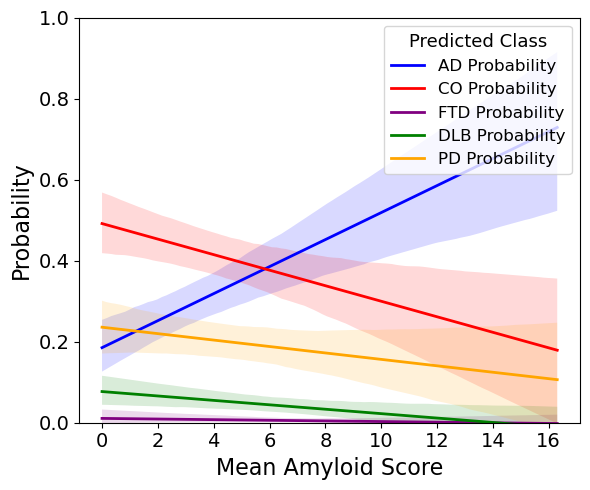

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

# Set variable of interest (independent variable for correlation)
x_var = 'amyloid'
# x_var = 'plaq_n'
# x_var = 'nft'

# Define predicted probability variables and their corresponding colors
y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']

# Filter dataset to include only MCI samples and drop rows with missing values
basic_mci = basic[basic['Status_at_draw'] == 'MCI'].copy()
# Uncomment below line to include all samples instead
# basic_mci = basic.copy()

# Check if the x variable exists in the data
if x_var not in basic_mci.columns:
    raise ValueError(f"{x_var} not found in the dataset!")

# Subset the data and drop missing values in x or y
plot_data = basic_mci[[x_var] + y_vars].dropna()
if plot_data.empty:
    raise ValueError(f"No data left after combining {x_var} with predicted probabilities!")

# Create a matplotlib figure
plt.figure(figsize=(6, 5))

# Initialize a list to store Pearson correlation results
corr_results = []

# Plot regression lines for each predicted probability (no scatter points)
for y_var, color in zip(y_vars, colors):
    sns.regplot(
        data=plot_data,
        x=x_var,
        y=y_var,
        scatter_kws={'s': 0},  # Hide scatter points
        line_kws={'color': color, 'linewidth': 2},
        color=color
    )

    # Compute Pearson correlation coefficient and p-value
    corr, pval = pearsonr(plot_data[x_var], plot_data[y_var])
    corr_results.append({'Status': y_var, 'Pearson_r': corr, 'p_value': pval})

# Customize and add legend
custom_lines = [Line2D([0], [0], color=c, lw=2) for c in colors]
plt.legend(custom_lines, y_vars, title='Predicted Class', loc='upper right', fontsize=12, title_fontsize=13)
# plt.legend([],[], frameon=False)

# Set axis labels and styling
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1)
plt.xlabel('Mean Amyloid Score', size=16)
# plt.xlabel('Neuritic Plaque Burden', size=16)
# plt.xlabel('Neurofibrillary Tangle Burden', size=16)
plt.ylabel('Probability', size=16)
plt.tight_layout()
plt.show()

# Optional: output correlation results as a DataFrame
# corr_df = pd.DataFrame(corr_results)
# print(f"\nPearson correlation with {x_var}:\n", corr_df)

# Optional: save results
# corr_df.to_csv(f'correlation_with_{x_var}.csv', index=False)
# plt.savefig(f'lineplot_regression_{x_var}.png', dpi=300)

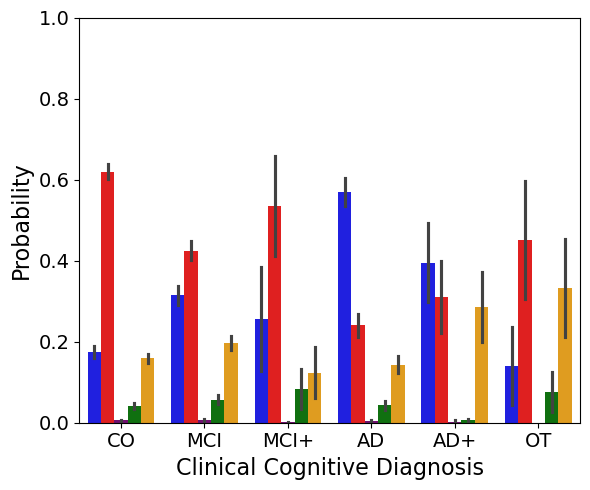

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define predicted probability variables and their corresponding colors
y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']
palette = dict(zip(y_vars, colors))

# Define category order and labels for the 'dcfdx' variable (clinical cognitive diagnosis)
dcfdx_order = [1, 2, 3, 4, 5, 6]
dcfdx_labels = ['CO', 'MCI', 'MCI+', 'AD', 'AD+', 'OT']

# Set the categorical variable to visualize
cat_var = 'dcfdx'

# Check if the variable exists in the dataset
if cat_var in longs.columns:
    # Subset data and drop rows with missing values in the selected columns
    plot_data = longs[[cat_var] + y_vars].dropna()

    # Reshape data from wide to long format for seaborn barplot
    plot_data_melted = plot_data.melt(
        id_vars=cat_var,
        value_vars=y_vars,
        var_name='Status',        # Predicted class
        value_name='Probability'  # Corresponding predicted probability
    )

    # Set the order of the categorical variable
    plot_data_melted[cat_var] = pd.Categorical(plot_data_melted[cat_var], categories=dcfdx_order, ordered=True)

    # Create the figure
    plt.figure(figsize=(6, 5))
    
    # Plot the barplot with standard error bars
    sns.barplot(
        data=plot_data_melted,
        x=cat_var,
        y='Probability',
        hue='Status',
        palette=palette,
        errorbar='se',
        estimator='mean'
    )

    # Customize tick labels and axis properties
    plt.xticks(ticks=range(len(dcfdx_order)), labels=dcfdx_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Clinical Cognitive Diagnosis", size=16)
    plt.ylabel("Probability", size=16)
    plt.ylim(0, 1)

    # Add legend
    # plt.legend(title='Predicted Class', loc='upper right', fontsize=12, title_fontsize=13)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.show()


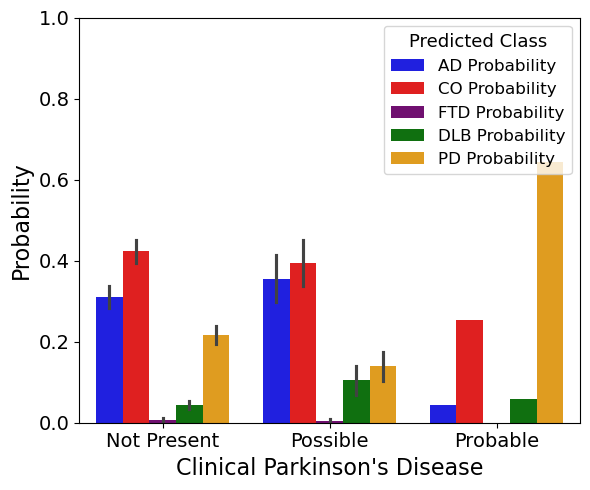

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define prediction class labels and their corresponding colors
y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']
palette = dict(zip(y_vars, colors))

# Define RPD category order and labels for plotting
# Full scale (optional):
# rpd_order = [4, 3, 2, 1]
# rpd_labels = ['Not Present', 'Possible', 'Probable', 'Highly Probable']

# # Condensed scale (used here)
rpd_order = [4, 3, 2]
rpd_labels = ['Not Present', 'Possible', 'Probable']

# Filter dataset (uncomment below to limit to MCI samples)
longs_mci = longs[longs['Status_at_draw'] == 'MCI']
# longs_mci = longs.copy()

# Set categorical variable for plotting
cat_var = 'r_pd'

# Only proceed if the variable exists in the dataset
if cat_var in longs_mci.columns:
    # Subset data and drop rows with missing values
    plot_data = longs_mci[[cat_var] + y_vars].dropna()

    # Reshape from wide to long format for seaborn plotting
    plot_data_melted = plot_data.melt(
        id_vars=cat_var,
        value_vars=y_vars,
        var_name='Status',        # Corresponds to each predicted class
        value_name='Probability'  # Corresponding predicted probability
    )

    # Ensure consistent category order
    plot_data_melted[cat_var] = pd.Categorical(plot_data_melted[cat_var], categories=rpd_order, ordered=True)

    # Initialize the figure
    plt.figure(figsize=(6, 5))

    # Plot grouped barplot with standard error bars
    sns.barplot(
        data=plot_data_melted,
        x=cat_var,
        y='Probability',
        hue='Status',
        palette=palette,
        errorbar='se',
        estimator='mean'
    )

    # Customize x-axis ticks and labels
    plt.xticks(ticks=range(len(rpd_order)), labels=rpd_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 1)
    plt.xlabel("Clinical Parkinson's Disease", size=16)
    plt.ylabel("Probability", size=16)

    # Add legend
    plt.legend(title='Predicted Class', loc='upper right', fontsize=12, title_fontsize=13)
    # plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.show()

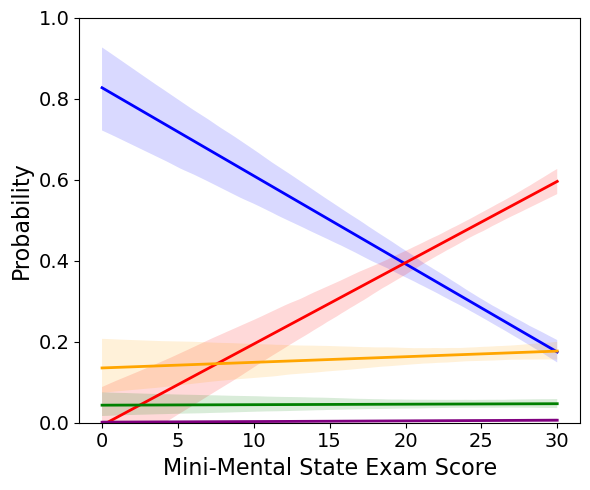

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

# Set the independent variable (x-axis)
x_var = 'cts_mmse30'
# x_var = 'cogn_ep'
# x_var = 'parksc'

# Set the predicted probability columns and corresponding colors
y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']

# Filter for MCI samples and remove missing values
# longs_mci = longs[longs['Status_at_draw'] == 'MCI']
longs_mci = longs.copy()
if x_var not in longs_mci.columns:
    raise ValueError(f"{x_var} is not found in the dataset!")

plot_data = longs_mci[[x_var] + y_vars].dropna()
if plot_data.empty:
    raise ValueError(f"Empty data after combining {x_var} with prediction probabilities!")

# Create the plot canvas
plt.figure(figsize=(6, 5))

# Initialize correlation results
corr_results = []

# Plot regression lines (scatter points hidden)
for y_var, color in zip(y_vars, colors):
    sns.regplot(
        data=plot_data,
        x=x_var,
        y=y_var,
        scatter_kws={'s': 0},
        line_kws={'color': color, 'linewidth': 2},
        color=color
    )

    # Calculate Pearson correlation
    corr, pval = pearsonr(plot_data[x_var], plot_data[y_var])
    corr_results.append({'Status': y_var, 'Pearson_r': corr, 'p_value': pval})

# Custom legend for each disease class
custom_lines = [Line2D([0], [0], color=c, lw=2) for c in colors]
# plt.legend(custom_lines, y_vars, title='Predicted Class', loc='upper left', fontsize=12, title_fontsize=13)
plt.legend([],[], frameon=False)

# Set axis labels and formatting
plt.xlabel('Mini-Mental State Exam Score', size=16)
# plt.xlabel('Episodic Memory Score', size=16)
plt.ylabel('Probability', size=16)
plt.ylim(0, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Optional: print correlation results
# corr_df = pd.DataFrame(corr_results)
# print(f"\nPearson correlation with {x_var}:\n", corr_df)

# Optional: save results as CSV and figure as PNG
# corr_df.to_csv(f'correlation_with_{x_var}.csv', index=False)
# plt.savefig(f'lineplot_regression_{x_var}.png', dpi=300)


### T-Test

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = basic.copy()
# df = basic[basic['Status_at_draw'].isin(['NCI', 'AD'])].copy()
# df = basic[basic['Status_at_draw'].isin(['NCI'])].copy()

df_clean = df.dropna(subset=['braaksc'])

df_plot = df_clean[df_clean['Predicted Class'].isin(['AD', 'CO'])].copy()

mean_braak_ad = df_plot[df_plot['Predicted Class'] == 'AD']['braaksc'].mean()
mean_braak_co = df_plot[df_plot['Predicted Class'] == 'CO']['braaksc'].mean()

print(f"Mean Braak stage for predicted AD: {mean_braak_ad:.2f}")
print(f"Mean Braak stage for predicted CO: {mean_braak_co:.2f}")

Mean Braak stage for predicted AD: 4.25
Mean Braak stage for predicted CO: 3.73


(257,)
(459,)
T-test p-value: 8.9874e-09


C:\Users\x.ying1\AppData\Local\Temp\ipykernel_11436\1916709809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Predicted Class', y='braaksc', data=df_plot, inner='box', palette='pastel')


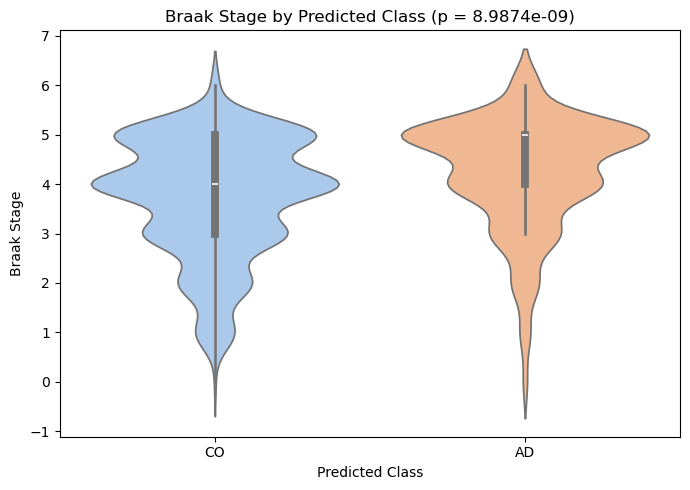

In [8]:
braak_ad = df_plot[df_plot['Predicted Class'] == 'AD']['braaksc']
print(braak_ad.shape)
braak_co = df_plot[df_plot['Predicted Class'] == 'CO']['braaksc']
print(braak_co.shape)
t_stat, p_val = ttest_ind(braak_ad, braak_co, equal_var=False)
print(f"T-test p-value: {p_val:.4e}")

plt.figure(figsize=(7, 5))
sns.violinplot(x='Predicted Class', y='braaksc', data=df_plot, inner='box', palette='pastel')
plt.title(f'Braak Stage by Predicted Class (p = {p_val:.4e})')
plt.ylabel('Braak Stage')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

Mean Plaq_n for predicted AD: 1.26
Mean Plaq_n for predicted CO: 0.85
(252,)
(455,)
T-test p-value: 8.5615e-09


C:\Users\x.ying1\AppData\Local\Temp\ipykernel_11436\2320071896.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Predicted Class', y='plaq_n', data=df_plot, inner='box', palette='pastel')


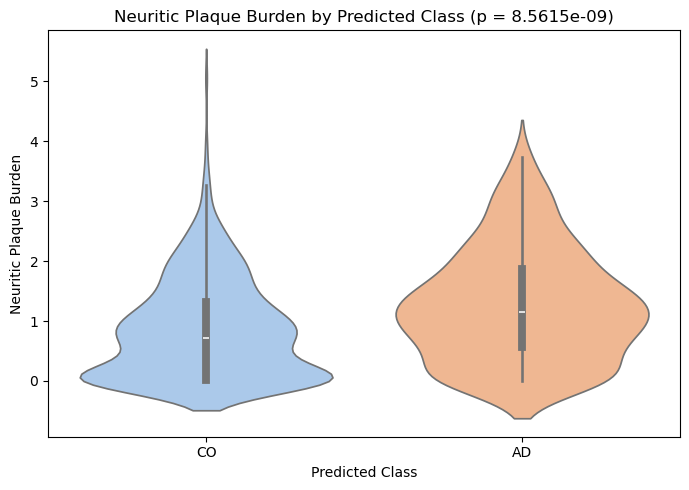

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
df = basic.copy()

df_clean = df.dropna(subset=['plaq_n'])

df_plot = df_clean[df_clean['Predicted Class'].isin(['AD', 'CO'])].copy()

mean_plaq_n_ad = df_plot[df_plot['Predicted Class'] == 'AD']['plaq_n'].mean()
mean_plaq_n_co = df_plot[df_plot['Predicted Class'] == 'CO']['plaq_n'].mean()

print(f"Mean Plaq_n for predicted AD: {mean_plaq_n_ad:.2f}")
print(f"Mean Plaq_n for predicted CO: {mean_plaq_n_co:.2f}")

plaq_n_ad = df_plot[df_plot['Predicted Class'] == 'AD']['plaq_n']
print(plaq_n_ad.shape)
plaq_n_co = df_plot[df_plot['Predicted Class'] == 'CO']['plaq_n']
print(plaq_n_co.shape)
t_stat, p_val = ttest_ind(plaq_n_ad, plaq_n_co, equal_var=False)
print(f"T-test p-value: {p_val:.4e}")

plt.figure(figsize=(7, 5))
sns.violinplot(x='Predicted Class', y='plaq_n', data=df_plot, inner='box', palette='pastel')
plt.title(f'Neuritic Plaque Burden by Predicted Class (p = {p_val:.4e})')
plt.ylabel('Neuritic Plaque Burden')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

Mean NFT for predicted AD: 1.10
Mean NFT for predicted CO: 0.68
(252,)
(454,)
T-test p-value: 1.1704e-08


C:\Users\x.ying1\AppData\Local\Temp\ipykernel_11436\3863751152.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Predicted Class', y='nft', data=df_plot, inner='box', palette='pastel')


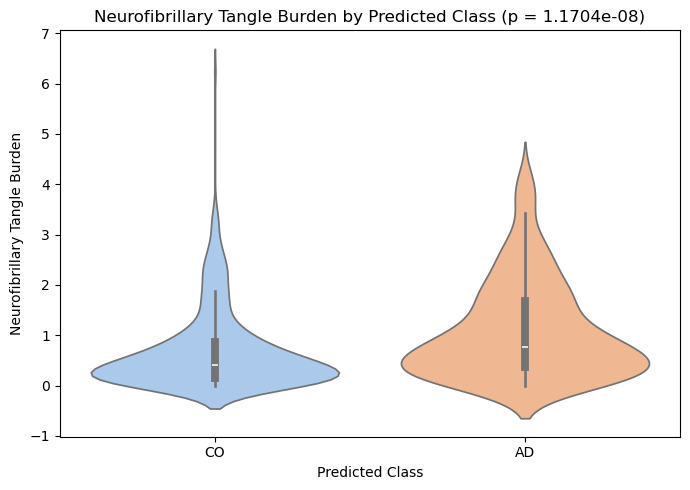

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
df = basic.copy()

df_clean = df.dropna(subset=['nft'])

df_plot = df_clean[df_clean['Predicted Class'].isin(['AD', 'CO'])].copy()

# 打印均值
mean_nft_ad = df_plot[df_plot['Predicted Class'] == 'AD']['nft'].mean()
mean_nft_co = df_plot[df_plot['Predicted Class'] == 'CO']['nft'].mean()

print(f"Mean NFT for predicted AD: {mean_nft_ad:.2f}")
print(f"Mean NFT for predicted CO: {mean_nft_co:.2f}")

nft_ad = df_plot[df_plot['Predicted Class'] == 'AD']['nft']
print(nft_ad.shape)
nft_co = df_plot[df_plot['Predicted Class'] == 'CO']['nft']
print(nft_co.shape)
t_stat, p_val = ttest_ind(nft_ad, nft_co, equal_var=False)
print(f"T-test p-value: {p_val:.4e}")

plt.figure(figsize=(7, 5))
sns.violinplot(x='Predicted Class', y='nft', data=df_plot, inner='box', palette='pastel')
plt.title(f'Neurofibrillary Tangle Burden by Predicted Class (p = {p_val:.4e})')
plt.ylabel('Neurofibrillary Tangle Burden')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()


Mean parksc for predicted PD: 13.29
Mean parksc for predicted CO: 9.84
(102,)
(334,)
T-test p-value: 5.4239e-03


C:\Users\x.ying1\AppData\Local\Temp\ipykernel_11436\2857936210.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Predicted Class', y='parksc', data=df_plot, inner='box', palette='pastel')


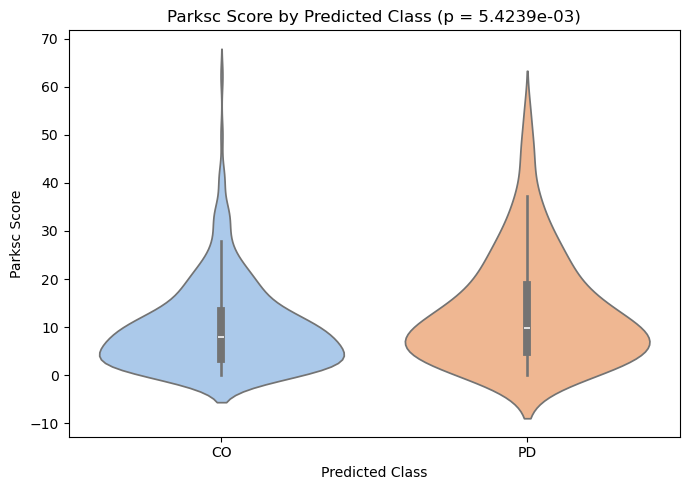

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = longs.copy()

df_clean = df.dropna(subset=['parksc'])

df_plot = df_clean[df_clean['Predicted Class'].isin(['PD', 'CO'])].copy()

mean_pd = df_plot[df_plot['Predicted Class'] == 'PD']['parksc'].mean()
mean_co = df_plot[df_plot['Predicted Class'] == 'CO']['parksc'].mean()

print(f"Mean parksc for predicted PD: {mean_pd:.2f}")
print(f"Mean parksc for predicted CO: {mean_co:.2f}")

pd_group = df_plot[df_plot['Predicted Class'] == 'PD']['parksc']
print(pd_group.shape)
co_group = df_plot[df_plot['Predicted Class'] == 'CO']['parksc']
print(co_group.shape)

t_stat, p_val = ttest_ind(pd_group, co_group, equal_var=False)
print(f"T-test p-value: {p_val:.4e}")

plt.figure(figsize=(7, 5))
sns.violinplot(x='Predicted Class', y='parksc', data=df_plot, inner='box', palette='pastel')
plt.title(f'Parksc Score by Predicted Class (p = {p_val:.4e})')
plt.ylabel('Parksc Score')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()
